# IEOR 223 Iron Condor SPX Options Code

In [152]:
import pandas as pd
import numpy as np
from datetime import datetime
index = pd.read_csv('SPX-index.csv')
options = pd.read_csv('SPX-options.csv')

## Data Cleaning and Analysis

In [153]:
index = index.drop(['ticker', 'secid'],axis =1)
index['date'] = index['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
index['closest_strike'] = np.round(index['close']/5)*5
index.head()

,date,low,high,open,close,closest_strike
0,2001-01-02,1276.05,1320.28,1320.28,1283.27,1285.0
1,2001-01-03,1274.62,1347.76,1283.27,1347.56,1350.0
2,2001-01-04,1329.14,1350.24,1347.56,1333.34,1335.0
3,2001-01-05,1294.95,1334.77,1333.34,1298.35,1300.0
4,2001-01-08,1276.29,1298.35,1298.35,1295.86,1295.0


In [154]:
from datetime import datetime
options1 = options.drop(['symbol','ticker','exercise_style','optionid'],axis=1)
options1['strike_price'] = options['strike_price'] / 1000

options1['date'] = options['date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
options1['exdate'] = options['exdate'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))

options1.head()

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,am_settlement,contract_size,expiry_indicator
0,2010-02-12,2010-02-20,2010-02-12,C,1000.0,73.8,76.8,13,884,1,100,NaN
1,2010-02-12,2010-02-20,2010-02-11,C,1005.0,68.9,71.9,0,44,1,100,NaN
2,2010-02-12,2010-02-20,2010-02-09,C,1010.0,64.0,67.0,0,42,1,100,NaN
3,2010-02-12,2010-02-20,2010-02-08,C,1015.0,59.2,62.2,0,47,1,100,NaN
4,2010-02-12,2010-02-20,2010-02-12,C,1020.0,54.4,57.4,2,150,1,100,NaN


In [155]:
options1['spread'] = options['best_offer'] - options['best_bid']
options1['mid_price'] = (options['best_offer'] + options['best_bid']) / 2
options1['time_to_exp'] = options1['exdate'] - options1['date']
options1['weekday'] = options1['date'].apply(lambda x: x.weekday())
options1['month'] = options1['date'].apply(lambda x: x.month)
options1['year'] = options1['date'].apply(lambda x: x.year)
options1.head()

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,am_settlement,contract_size,expiry_indicator,spread,mid_price,time_to_exp,weekday,month,year
0,2010-02-12,2010-02-20,2010-02-12,C,1000.0,73.8,76.8,13,884,1,100,NaN,3.0,75.3,8 days,4,2,2010
1,2010-02-12,2010-02-20,2010-02-11,C,1005.0,68.9,71.9,0,44,1,100,NaN,3.0,70.4,8 days,4,2,2010
2,2010-02-12,2010-02-20,2010-02-09,C,1010.0,64.0,67.0,0,42,1,100,NaN,3.0,65.5,8 days,4,2,2010
3,2010-02-12,2010-02-20,2010-02-08,C,1015.0,59.2,62.2,0,47,1,100,NaN,3.0,60.7,8 days,4,2,2010
4,2010-02-12,2010-02-20,2010-02-12,C,1020.0,54.4,57.4,2,150,1,100,NaN,3.0,55.9,8 days,4,2,2010


In [156]:
np.mean(options1['strike_price'])

2923.2594443376684

Text(0.5, 1.0, 'Distribution of Days to Expiration')

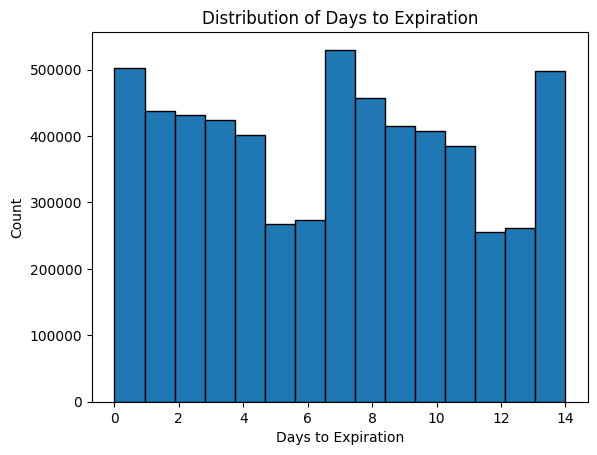

In [157]:
import matplotlib.pyplot as plt
plt.hist(options1['time_to_exp'].dt.days, edgecolor = 'black', bins=15)
plt.xlabel('Days to Expiration')
plt.ylabel('Count')
plt.title('Distribution of Days to Expiration')

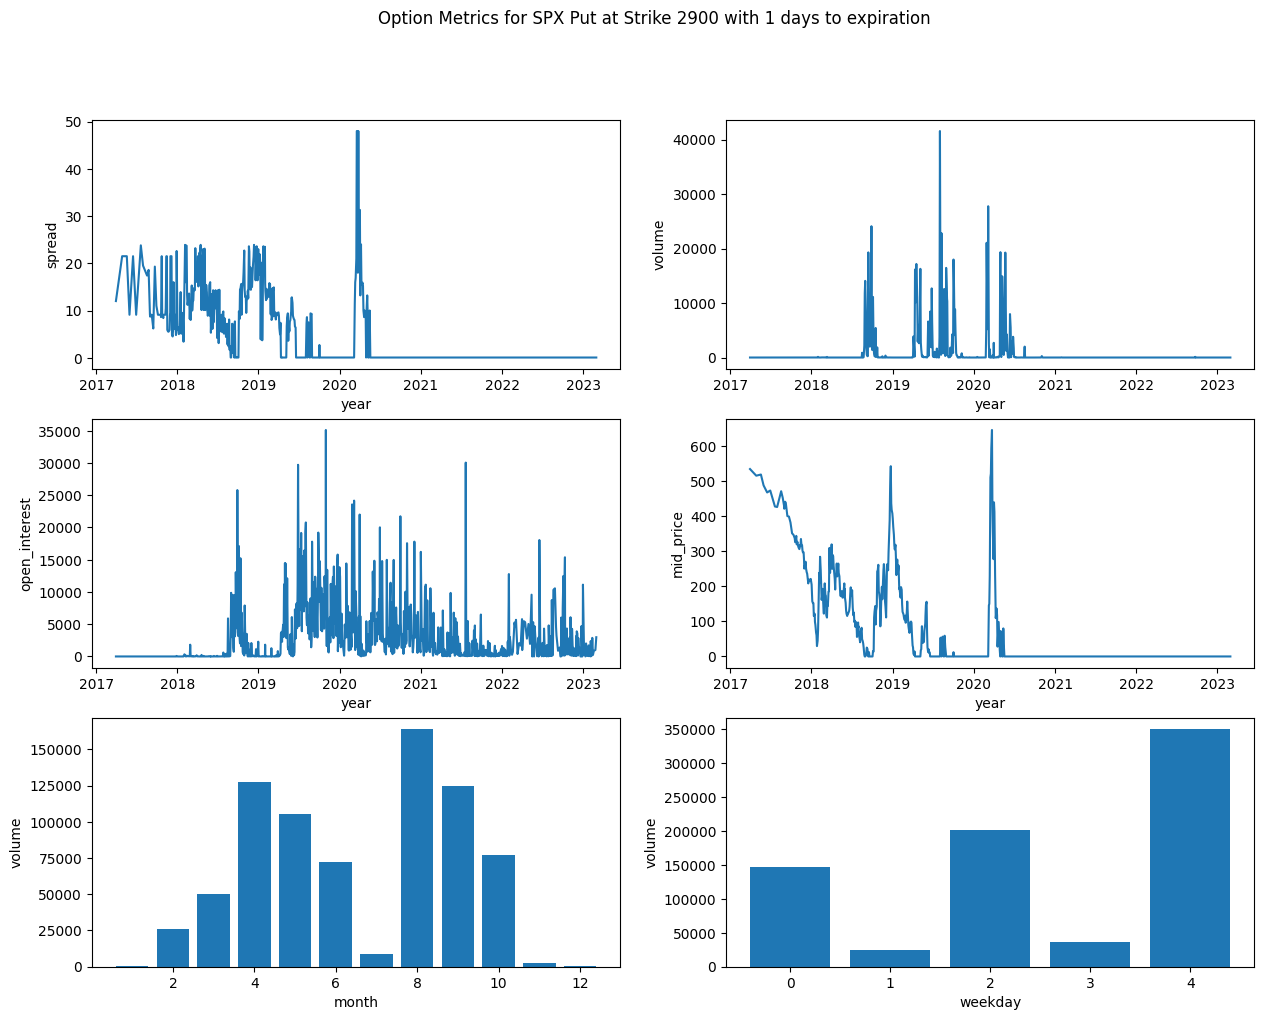

In [158]:
import matplotlib.pyplot as plt
from datetime import timedelta

def metric_plotter(strike,cp_flag,days):
    options2 = options1[(options1['strike_price'] == strike) & (options1['cp_flag'] == cp_flag) & (options1['time_to_exp']== timedelta(days = 0))]
    fig, ax = plt.subplots(3,2)
    fig.set_figwidth(15)
    fig.set_figheight(11)
    
    ax[0][0].plot(options2['date'],options2['spread'])
    ax[0][0].set_xlabel('year')
    ax[0][0].set_ylabel('spread')
    ax[0][1].plot(options2['date'],options2['volume'])
    ax[0][1].set_xlabel('year')
    ax[0][1].set_ylabel('volume')
    ax[1][0].plot(options2['date'],options2['open_interest'])
    ax[1][0].set_xlabel('year')
    ax[1][0].set_ylabel('open_interest')
    ax[1][1].plot(options2['date'],options2['mid_price'])
    ax[1][1].set_xlabel('year')
    ax[1][1].set_ylabel('mid_price')
    ax[2][0].bar(x =options2.groupby('month')['volume'].sum().index, height = options2.groupby('month')['volume'].sum())
    ax[2][0].set_xlabel('month')
    ax[2][0].set_ylabel('volume')
    ax[2][1].bar(x = options2.groupby('weekday')['volume'].sum().index, height = options2.groupby('weekday')['volume'].sum())
    ax[2][1].set_xlabel('weekday')
    ax[2][1].set_ylabel('volume')

    name = ''
    if cp_flag == "C":
        name = "Call"
    else:
        name = "Put"


    plt.suptitle(f"Option Metrics for SPX {name} at Strike {strike} with {days} days to expiration")

metric_plotter(2900,cp_flag='P',days=1)


In [159]:
# Create datasets for differnt time to expiration
zeroDTE = options1[options1['time_to_exp'] == timedelta(days = 0)].reset_index()
oneDTE = options1[options1['time_to_exp'] == timedelta(days = 1)].reset_index()
sevenDTE = options1[options1['time_to_exp'] == timedelta(days = 7)].reset_index()
fourteenDTE = options1[options1['time_to_exp'] == timedelta(days = 14)].reset_index()

## One Day to Expiration Iron Condor Strat

In [160]:
import yfinance
first_date = oneDTE['date'][0]
last_date = oneDTE['date'][len(oneDTE)-1]
rf = yfinance.download("^TNX",  start = first_date , end = last_date + timedelta(days=1))
rfr = rf.reset_index()[["Date",'Close']]
roneDTE = oneDTE.merge(rfr, left_on='date', right_on='Date', how='left').drop(['Date','index'], axis = 1).rename(columns={"Close": "risk_free"})
roneDTE.head()


[*********************100%%**********************]  1 of 1 completed


,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,am_settlement,contract_size,expiry_indicator,spread,mid_price,time_to_exp,weekday,month,year,risk_free
0,2010-02-25,2010-02-26,NaN,C,1000.0,100.7,104.7,0,1,0,100,m,4.0,102.7,1 days,3,2,2010,3.642
1,2010-02-25,2010-02-26,NaN,C,1025.0,75.7,79.7,0,2,0,100,m,4.0,77.7,1 days,3,2,2010,3.642
2,2010-02-25,2010-02-26,2010-02-25,C,1050.0,50.7,54.7,5,0,0,100,m,4.0,52.7,1 days,3,2,2010,3.642
3,2010-02-25,2010-02-26,2010-02-25,C,1075.0,25.7,29.7,25,106,0,100,m,4.0,27.7,1 days,3,2,2010,3.642
4,2010-02-25,2010-02-26,2010-02-25,C,1090.0,11.6,14.8,140,0,0,100,m,3.2,13.2,1 days,3,2,2010,3.642


In [161]:
from scipy.stats import norm
from scipy.optimize import fmin

#roneDTE = roneDTE[roneDTE['cp_flag']=='C'].reset_index()

mprice = roneDTE['best_offer'][10]
K = roneDTE['strike_price'][10]
r = roneDTE['risk_free'][10]
T = roneDTE['time_to_exp'][10].days / 252 # num trading days
S = index[index['date'] == roneDTE['date'][10]]['close'].iloc[0]

def ImpliedVol(S,K,r,T,mprice, call = True):
    def ImpliedVolatilityPut(s):
        d1 = (np.log(S/K) + (r +.5*s[0]**2)*T)/(s[0] * np.sqrt(T))
        d2 = d1 - s[0]*np.sqrt(T)
        of = (K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1) ) - mprice
        val = of**2
        return(val)
    def ImpliedVolatilityCall(s):
        d1 = (np.log(S/K) + (r +.5*s[0]**2)*T)/(s[0] * np.sqrt(T))
        d2 = d1 - s[0]*np.sqrt(T)
        of = (S*np.exp(-r*T)*norm.cdf(d1) - S*norm.cdf(d2) ) - mprice
        val = of**2
        return(val)
    if call == True:
        return fmin(ImpliedVolatilityCall, [1], disp=False)[0]
    else:
        return fmin(ImpliedVolatilityPut, [1], disp=False)[0]
ImpliedVol(S,K,r,T,mprice, call = True)

0.15712890624999923

In [162]:
#Number of days with one day of expiration options
len(roneDTE['date'].unique())

1074

In [163]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [164]:
# Find strikes and prices of options for strategy
lput_strikes = []
sput_strikes = []
scall_strikes = []
lcall_strikes = []

lp_vols = []
sp_vols = []
sc_vols = []
lc_vols = []

unique_dates = roneDTE['date'].unique()

lp_prices = []
sp_prices = []
sc_prices = []
lc_prices = []
spx_next_day = []
spx_day = []
dates = []
rates = []
for i in unique_dates[:-1]:
    mid = index[index['date'] == i]['closest_strike']
    j = index[index['date'] == i].index[0]

    strikesi = roneDTE[(roneDTE['date'] == i)]['strike_price'].sort_values().reset_index()['strike_price']
    indexj = index.iloc[j]['close']
    nearest_real_strike_index = find_nearest(strikesi,indexj)

    lput_strike = strikesi[nearest_real_strike_index-5]
    sput_strike = strikesi[nearest_real_strike_index-3]
    scall_strike = strikesi[nearest_real_strike_index+3]
    lcall_strike = strikesi[nearest_real_strike_index+5]
    if sput_strike - lput_strike != lcall_strike - scall_strike:
        lput_strike = strikesi[find_nearest(strikesi, sput_strike - lcall_strike + scall_strike)]

    if sput_strike - lput_strike == lcall_strike - scall_strike:
        lput_strikes.append(lput_strike)
        sput_strikes.append(sput_strike)
        scall_strikes.append(scall_strike)
        lcall_strikes.append(lcall_strike)


        lp_price = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'P') & (roneDTE['strike_price'] == lput_strike)]['best_offer'].iloc[0]
        sp_price = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'P') & (roneDTE['strike_price'] == sput_strike)]['best_bid'].iloc[0]
        lc_price = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'C') & (roneDTE['strike_price'] == lcall_strike)]['best_offer'].iloc[0]
        sc_price = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'C') & (roneDTE['strike_price'] == scall_strike)]['best_bid'].iloc[0]

        lp_vol = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'P') & (roneDTE['strike_price'] == lput_strike)]['volume'].iloc[0]
        sp_vol = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'P') & (roneDTE['strike_price'] == sput_strike)]['volume'].iloc[0]
        lc_vol = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'C') & (roneDTE['strike_price'] == lcall_strike)]['volume'].iloc[0]
        sc_vol = roneDTE[(roneDTE['date'] == i) & (roneDTE['cp_flag'] == 'C') & (roneDTE['strike_price'] == scall_strike)]['volume'].iloc[0]

        rfr = roneDTE[(roneDTE['date'] == i)]['risk_free'].iloc[0]
        rates.append(rfr)

        lp_prices.append(lp_price)
        sp_prices.append(sp_price)
        sc_prices.append(sc_price)
        lc_prices.append(lc_price)

        lp_vols.append(lp_vol)
        sp_vols.append(sp_vol)
        sc_vols.append(sc_vol)
        lc_vols.append(lc_vol)


        next_day = index['close'][j+1]
        day_of = index['close'][j]
        date = index['date'][j]
        spx_next_day.append(next_day)
        spx_day.append(day_of)
        dates.append(date)
cost  = np.array(lp_prices) - np.array(sp_prices) -  np.array(sc_prices) + np.array(lc_prices)

In [165]:
iron_df = pd.DataFrame({'date': dates, 
                        'long_puts': lput_strikes, 'short_puts': sput_strikes, 'short_calls':scall_strikes,'long_calls':lcall_strikes, 
                        'lp_volume': lp_vols, 'sp_volume':sp_vols, 'sc_volume': sc_vols, 'lc_volume': lc_vols,
                        'next_day_spx': spx_next_day, "day_spx":spx_day, "risk_free":rates, 'cost': cost})
iron_df.head()

,date,long_puts,short_puts,short_calls,long_calls,lp_volume,sp_volume,sc_volume,lc_volume,next_day_spx,day_spx,risk_free,cost
0,2010-03-04,1075.0,1100.0,1150.0,1175.0,390,1167,921,510,1138.70,1122.97,3.606,0.00
1,2010-03-30,1160.0,1165.0,1180.0,1185.0,488,259,10327,1316,1169.43,1173.27,3.868,-0.40
2,2010-03-31,1100.0,1125.0,1200.0,1225.0,15,175,2640,1604,1178.10,1169.43,3.833,0.10
3,2010-04-08,1100.0,1125.0,1200.0,1225.0,452,2586,1003,126,1194.37,1186.44,3.896,0.10
4,2010-04-22,1125.0,1150.0,1225.0,1250.0,836,2776,1646,220,1217.28,1208.67,3.772,0.05


In [166]:
# Calculate profit and implied volatility of each strategy
profit  = np.zeros(len(iron_df))
for i in range(len(iron_df)):
    if (iron_df['short_puts'][i] - iron_df['long_puts'][i] != iron_df['long_calls'][i] - iron_df['short_calls'][i]):
        continue
    elif (iron_df['next_day_spx'][i] <= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]):
        profit[i] = 0
    elif (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] <= iron_df['long_calls'][i]):
        profit[i] = iron_df['short_calls'][i] - iron_df['next_day_spx'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_puts'][i]) and (iron_df['next_day_spx'][i] <= iron_df['short_puts'][i]):
        profit[i] = iron_df['short_puts'][i] - iron_df['next_day_spx'][i]
    elif(iron_df['next_day_spx'][i] <= iron_df['long_puts'][i]):
        profit[i] = iron_df['long_puts'][i] - iron_df['short_puts'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_calls'][i]):
        profit[i]  = iron_df['short_calls'][i] - iron_df['long_calls'][i]
iron_df['profit'] = profit
iron_df['net'] = profit - cost 

imp_vols = []
for i in range(len(iron_df)):
    S = iron_df['day_spx'][i]
    K = iron_df['short_calls'][i]
    r = iron_df['risk_free'][i]
    mprice = sc_prices[i]
    T = 1/252
    iv = ImpliedVol(S,K,r,T,mprice=mprice)
    imp_vols.append(iv)
iron_df['imp_vols'] = imp_vols

In [168]:
#Distribution of Net Profit by just buying the strategy
iron_df.describe()['net']

count    1056.000000
mean       -0.495455
min       -18.700000
25%        -2.300000
50%        -1.300000
75%         1.550000
max         8.160000
std         2.520421
Name: net, dtype: float64

In [169]:
print('Median net buy profit with max implied volatility of 0.19')
print(np.median(iron_df[iron_df['imp_vols'] < 0.19]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['imp_vols'] < 0.19]))

Median net buy profit with max implied volatility of 0.19
0.025
Number of Viable Days
50


In [170]:
print('Median net sell profit with max implied volatility of 0.19')
print(np.median(-iron_df[iron_df['imp_vols'] > 0.2]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['imp_vols'] > 0.2]))

Median net sell profit with max implied volatility of 0.19
1.3000000000000043
Number of Viable Days
982


In [173]:
iron_df['buy'] = iron_df['imp_vols'] < 0.19
iron_df['sell'] = iron_df['imp_vols'] > 0.2

In [174]:
iron_df['net_buy'] = iron_df['net'] * iron_df['buy']
iron_df['net_sell'] = -iron_df['net'] * iron_df['sell']
iron_df['strat_daily_net'] = iron_df['net_buy'] + iron_df['net_sell']
iron_df.describe()['strat_daily_net']

count    1056.000000
mean        0.467083
min        -8.160000
25%        -1.550000
50%         1.300000
75%         2.300000
max        15.400000
std         2.445051
Name: strat_daily_net, dtype: float64

Text(0.5, 1.0, 'One Day IV Strategy Profits')

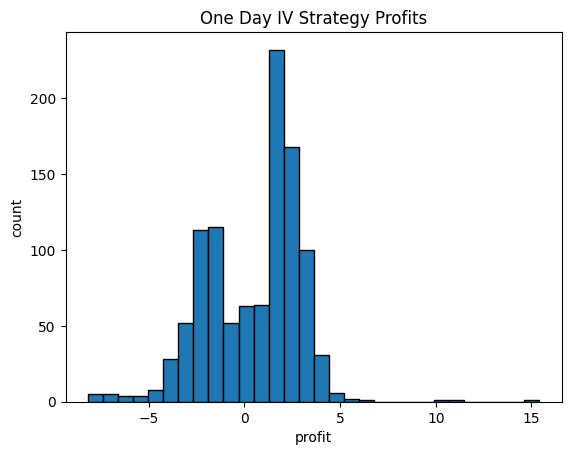

In [175]:
plt.hist(iron_df['strat_daily_net'], edgecolor = 'black', bins = 30)
plt.xlabel('profit')
plt.ylabel('count')
plt.title("One Day IV Strategy Profits")

In [176]:
#proportion of days you make money
np.sum(iron_df['strat_daily_net'] > 0) / len(iron_df) 

0.5928030303030303

In [177]:
print('Median net sell profit with Volume Strat')
print(-np.median(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]))

Median net sell profit with Volume Strat
1.3799999999999701
Number of Viable Days
506


In [178]:
print('Median net Buy profit with Volume Strat')
print(np.median(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] < -50000]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] < -50000]))

Median net Buy profit with Volume Strat
-1.8499999999999999
Number of Viable Days
1


In [180]:
vol_sell = iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0
iron_df['volume_strat'] = -iron_df['net'] * vol_sell
iron_df.describe()['volume_strat']

count    1056.000000
mean        0.229252
min        -7.130000
25%         0.000000
50%        -0.000000
75%         1.300000
max        18.700000
std         1.758417
Name: volume_strat, dtype: float64

Text(0.5, 1.0, 'One Day Volume Strategy Profits')

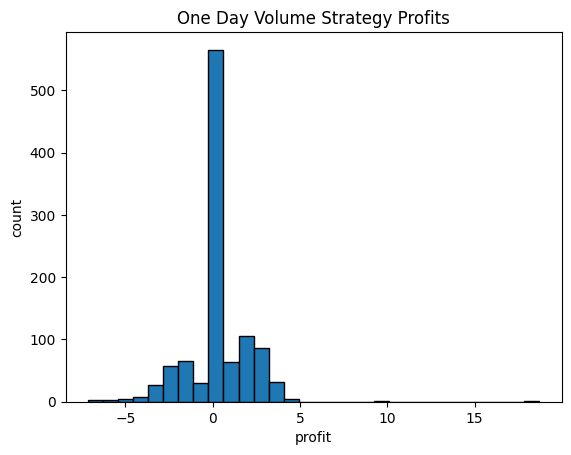

In [181]:
plt.hist(iron_df['volume_strat'], edgecolor = 'black', bins = 30)
plt.xlabel('profit')
plt.ylabel('count')
plt.title("One Day Volume Strategy Profits")

In [182]:
np.sum(iron_df['volume_strat'] > 0) / len(iron_df['volume_strat'])

0.2859848484848485

## Seven Days to Expiration Iron Condor Strat

In [217]:
#Add risk free rate data to dataset
import yfinance
first_date = sevenDTE['date'][0]
last_date = sevenDTE['date'][len(fourteenDTE)-1]
rf = yfinance.download("^TNX",  start = first_date , end = last_date + timedelta(days=1))
rfr = rf.reset_index()[["Date",'Close']]
rsevenDTE = sevenDTE.merge(rfr, left_on='date', right_on='Date', how='left').drop(['Date','index'], axis = 1).rename(columns={"Close": "risk_free"})
rsevenDTE.head()

[*********************100%%**********************]  1 of 1 completed


,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,am_settlement,contract_size,expiry_indicator,spread,mid_price,time_to_exp,weekday,month,year,risk_free
0,2010-02-19,2010-02-26,2010-02-25,C,1000.0,107.0,109.9,1,0,0,100,m,2.9,108.45,7 days,4,2,2010,3.782
1,2010-02-19,2010-02-26,NaN,C,1025.0,82.3,85.1,2,0,0,100,m,2.8,83.70,7 days,4,2,2010,3.782
2,2010-02-19,2010-02-26,NaN,C,1050.0,58.2,60.2,0,0,0,100,m,2.0,59.20,7 days,4,2,2010,3.782
3,2010-02-19,2010-02-26,NaN,C,1075.0,34.5,36.5,2,0,0,100,m,2.0,35.50,7 days,4,2,2010,3.782
4,2010-02-19,2010-02-26,2010-02-25,C,1100.0,14.1,15.8,108,0,0,100,m,1.7,14.95,7 days,4,2,2010,3.782


In [218]:
#Find strikes and prices of options for the strategy
lput_strikes = []
sput_strikes = []
scall_strikes = []
lcall_strikes = []

lp_vols = []
sp_vols = []
sc_vols = []
lc_vols = []

unique_dates = rsevenDTE['date'].unique()

lp_prices = []
sp_prices = []
sc_prices = []
lc_prices = []
spx_next_day = []
spx_day = []
dates = []
rates = []

for i in unique_dates[:-7]:
    j = index[index['date'] == i].index[0]

    strikesi = rsevenDTE[(rsevenDTE['date'] == i)]['strike_price'].sort_values().reset_index()['strike_price']
    indexj = index.iloc[j]['close']
    nearest_real_strike_index = find_nearest(strikesi,indexj)

    lput_strike = strikesi[nearest_real_strike_index-5]
    sput_strike = strikesi[nearest_real_strike_index-3]
    scall_strike = strikesi[nearest_real_strike_index+3]
    lcall_strike = strikesi[nearest_real_strike_index+5]
    if sput_strike - lput_strike != lcall_strike - scall_strike:
        lput_strike = strikesi[find_nearest(strikesi, sput_strike - lcall_strike + scall_strike)]

    if sput_strike - lput_strike == lcall_strike - scall_strike:
        lput_strikes.append(lput_strike)
        sput_strikes.append(sput_strike)
        scall_strikes.append(scall_strike)
        lcall_strikes.append(lcall_strike)


        lp_price = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'P') & (rsevenDTE['strike_price'] == lput_strike)]['best_offer'].iloc[0]
        sp_price = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'P') & (rsevenDTE['strike_price'] == sput_strike)]['best_bid'].iloc[0]
        lc_price = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'C') & (rsevenDTE['strike_price'] == lcall_strike)]['best_offer'].iloc[0]
        sc_price = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'C') & (rsevenDTE['strike_price'] == scall_strike)]['best_bid'].iloc[0]

        lp_vol = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'P') & (rsevenDTE['strike_price'] == lput_strike)]['volume'].iloc[0]
        sp_vol = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'P') & (rsevenDTE['strike_price'] == sput_strike)]['volume'].iloc[0]
        lc_vol = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'C') & (rsevenDTE['strike_price'] == lcall_strike)]['volume'].iloc[0]
        sc_vol = rsevenDTE[(rsevenDTE['date'] == i) & (rsevenDTE['cp_flag'] == 'C') & (rsevenDTE['strike_price'] == scall_strike)]['volume'].iloc[0]

        rfr = rsevenDTE[(rsevenDTE['date'] == i)]['risk_free'].iloc[0]
        rates.append(rfr)

        lp_prices.append(lp_price)
        sp_prices.append(sp_price)
        sc_prices.append(sc_price)
        lc_prices.append(lc_price)

        lp_vols.append(lp_vol)
        sp_vols.append(sp_vol)
        sc_vols.append(sc_vol)
        lc_vols.append(lc_vol)

        next_day = index['close'][j+7]
        day_of = index['close'][j]
        date = index['date'][j]
        spx_next_day.append(next_day)
        spx_day.append(day_of)
        dates.append(date)
cost  = np.array(lp_prices) - np.array(sp_prices) -  np.array(sc_prices) + np.array(lc_prices)

In [219]:
iron_df = pd.DataFrame({'date': dates, 
                        'long_puts': lput_strikes, 'short_puts': sput_strikes, 'short_calls':scall_strikes,'long_calls':lcall_strikes, 
                        'lp_volume': lp_vols, 'sp_volume':sp_vols, 'sc_volume': sc_vols, 'lc_volume': lc_vols,
                        'next_day_spx': spx_next_day, "day_spx":spx_day, "risk_free":rates, 'cost': cost})
iron_df.head()

,date,long_puts,short_puts,short_calls,long_calls,lp_volume,sp_volume,sc_volume,lc_volume,next_day_spx,day_spx,risk_free,cost
0,2010-02-19,1025.0,1050.0,1125.0,1150.0,1907,2099,2626,1408,1118.31,1109.17,3.782,-2.05
1,2010-02-26,1025.0,1050.0,1125.0,1150.0,2555,2386,793,941,1140.45,1104.49,3.595,-1.50
2,2010-03-05,1075.0,1100.0,1175.0,1200.0,803,371,675,1530,1159.46,1138.70,3.682,-0.85
3,2010-03-19,1075.0,1100.0,1175.0,1200.0,3140,915,856,4556,1173.27,1159.90,3.687,-1.55
4,2010-03-24,1155.0,1160.0,1175.0,1180.0,24,54,1250,29,1187.44,1167.72,3.829,-1.70


In [220]:
# Calculate profit and implied volatility for this Strategy
profit  = np.zeros(len(iron_df))
for i in range(len(iron_df)):
    if (iron_df['short_puts'][i] - iron_df['long_puts'][i] != iron_df['long_calls'][i] - iron_df['short_calls'][i]):
        continue
    elif (iron_df['next_day_spx'][i] <= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]):
        profit[i] = 0
    elif (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] <= iron_df['long_calls'][i]):
        profit[i] = iron_df['short_calls'][i] - iron_df['next_day_spx'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_puts'][i]) and (iron_df['next_day_spx'][i] <= iron_df['short_puts'][i]):
        profit[i] = iron_df['short_puts'][i] - iron_df['next_day_spx'][i]
    elif(iron_df['next_day_spx'][i] <= iron_df['long_puts'][i]):
        profit[i] = iron_df['long_puts'][i] - iron_df['short_puts'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_calls'][i]):
        profit[i]  = iron_df['short_calls'][i] - iron_df['long_calls'][i]
iron_df['profit'] = profit
iron_df['net'] = profit - cost 

imp_vols = []
for i in range(len(iron_df)):
    S = iron_df['day_spx'][i]
    K = iron_df['short_calls'][i]
    r = iron_df['risk_free'][i]
    mprice = sc_prices[i]
    T = 7/252
    iv = ImpliedVol(S,K,r,T,mprice=mprice)
    imp_vols.append(iv)
iron_df['imp_vols'] = imp_vols

In [221]:
#Distribution of Net Profit
iron_df.describe()['net']

count    1366.000000
mean       -1.162848
min       -25.200000
25%        -2.200000
50%        -1.600000
75%        -1.200000
max        68.080000
std         3.180202
Name: net, dtype: float64

In [222]:
print("Median Net Profit of Buy Strat")
print(np.median(iron_df[iron_df['imp_vols'] < 0.26]['net']))
print("Number of Viable Days")
print(len(iron_df[iron_df['imp_vols'] < 0.26]['net']))

Median Net Profit of Buy Strat
-1.2999999999999972
Number of Viable Days
1


In [223]:
print("Median Net Profit of Sell Strat")
print(-np.median(iron_df[iron_df['imp_vols'] > 0.26]['net']))
print("Number of Viable Days")
print(len(iron_df[iron_df['imp_vols'] > 0.26]['net']))

Median Net Profit of Sell Strat
1.5999999999999979
Number of Viable Days
1365


In [225]:
iron_df['sell'] = iron_df['imp_vols'] > 0.25

iron_df['net_sell'] = -iron_df['net'] * iron_df['sell']
iron_df['strat_daily_net'] = iron_df['net_sell']
iron_df.describe()['strat_daily_net']

count    1366.000000
mean        1.162848
min       -68.080000
25%         1.200000
50%         1.600000
75%         2.200000
max        25.200000
std         3.180202
Name: strat_daily_net, dtype: float64

Text(0.5, 1.0, 'Seven Day IV Strategy Profits')

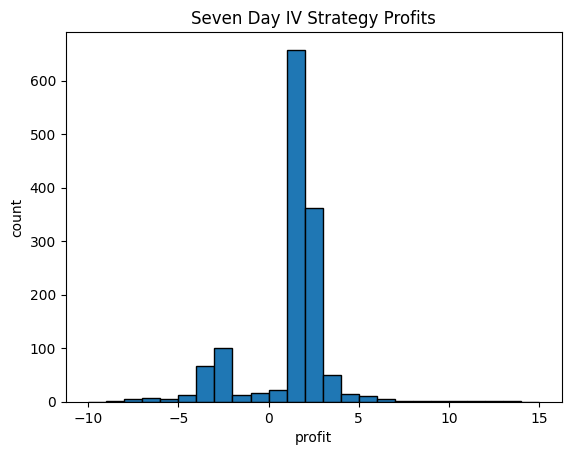

In [239]:
plt.hist(iron_df['strat_daily_net'], edgecolor = 'black', bins = 25, range = (-10,15))
plt.xlabel('profit')
plt.ylabel('count')
plt.title("Seven Day IV Strategy Profits")

In [227]:
#proportion of days you make money
np.sum(iron_df['strat_daily_net'] > 0) /  len(iron_df['strat_daily_net']) 

0.8323572474377745

In [228]:
print('Median net sell profit with Volume Strat')
print(-np.median(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]))

Median net sell profit with Volume Strat
1.6000000000000014
Number of Viable Days
648


In [229]:
#profit each day of volume strat
vol_sell = iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0
iron_df['volume_strat'] = -iron_df['net'] * vol_sell
iron_df.describe()['volume_strat']

count    1366.000000
mean        0.529378
min       -68.080000
25%         0.000000
50%         0.000000
75%         1.500000
max        22.700000
std         2.598625
Name: volume_strat, dtype: float64

Text(0.5, 1.0, 'Seven Day Volume Strategy Profits')

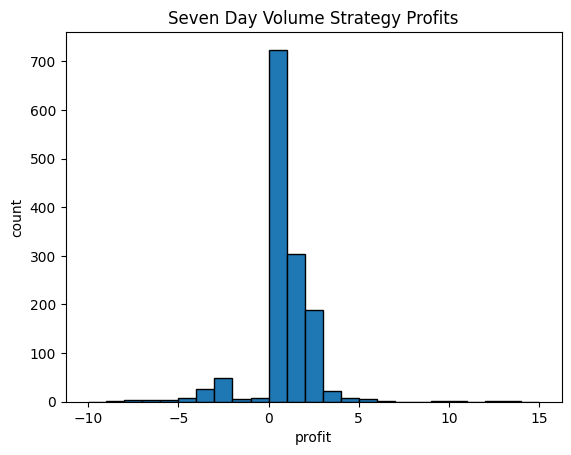

In [238]:
plt.hist(iron_df['volume_strat'], edgecolor = 'black', bins = 25, range = (-10,15))
plt.xlabel('profit')
plt.ylabel('count')
plt.title("Seven Day Volume Strategy Profits")

In [231]:
#Proportion of days you make a profit
np.sum(iron_df['volume_strat'] > 0) /  len(iron_df['volume_strat']) 

0.39604685212298685

## Fourteen Days to Expiration Iron Condor Strat

In [198]:
#add risk free rate to dataset
import yfinance
first_date = fourteenDTE['date'][0]
last_date = fourteenDTE['date'][len(fourteenDTE)-1]
rf = yfinance.download("^TNX",  start = first_date , end = last_date + timedelta(days=1))
rfr = rf.reset_index()[["Date",'Close']]
rfourteenDTE = fourteenDTE.merge(rfr, left_on='date', right_on='Date', how='left').drop(['Date','index'], axis = 1).rename(columns={"Close": "risk_free"})
rfourteenDTE.head()

[*********************100%%**********************]  1 of 1 completed

,date,exdate,last_date,cp_flag,strike_price,best_bid,best_offer,volume,open_interest,am_settlement,contract_size,expiry_indicator,spread,mid_price,time_to_exp,weekday,month,year,risk_free
0,2010-03-17,2010-03-31,2010-03-09,C,1000.0,163.5,167.7,0,1,0,100,m,4.2,165.6,14 days,2,3,2010,3.642
1,2010-03-17,2010-03-31,2010-03-17,C,1025.0,138.7,142.9,20,3,0,100,m,4.2,140.8,14 days,2,3,2010,3.642
2,2010-03-17,2010-03-31,2010-03-10,C,1050.0,113.8,118.0,0,27,0,100,m,4.2,115.9,14 days,2,3,2010,3.642
3,2010-03-17,2010-03-31,NaN,C,1060.0,104.0,108.2,0,0,0,100,m,4.2,106.1,14 days,2,3,2010,3.642
4,2010-03-17,2010-03-31,NaN,C,1065.0,99.0,103.2,0,0,0,100,m,4.2,101.1,14 days,2,3,2010,3.642


In [199]:
# Find strikes and prices of options for each date for the strategy
lput_strikes = []
sput_strikes = []
scall_strikes = []
lcall_strikes = []

lp_vols = []
sp_vols = []
sc_vols = []
lc_vols = []

unique_dates = rfourteenDTE['date'].unique()

lp_prices = []
sp_prices = []
sc_prices = []
lc_prices = []
spx_next_day = []
spx_day = []
dates = []
rates = []

for i in unique_dates[:-14]:
    j = index[index['date'] == i].index[0]

    strikesi = rfourteenDTE[(rfourteenDTE['date'] == i)]['strike_price'].sort_values().reset_index()['strike_price']
    indexj = index.iloc[j]['close']
    nearest_real_strike_index = find_nearest(strikesi,indexj)

    lput_strike = strikesi[nearest_real_strike_index-5]
    sput_strike = strikesi[nearest_real_strike_index-3]
    scall_strike = strikesi[nearest_real_strike_index+3]
    lcall_strike = strikesi[nearest_real_strike_index+5]
    if sput_strike - lput_strike != lcall_strike - scall_strike:
        lput_strike = strikesi[find_nearest(strikesi, sput_strike - lcall_strike + scall_strike)]
    if sput_strike - lput_strike == lcall_strike - scall_strike:
        lput_strikes.append(lput_strike)
        sput_strikes.append(sput_strike)
        scall_strikes.append(scall_strike)
        lcall_strikes.append(lcall_strike)

        lp_price = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'P') & (rfourteenDTE['strike_price'] == lput_strike)]['best_offer'].iloc[0]
        sp_price = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'P') & (rfourteenDTE['strike_price'] == sput_strike)]['best_bid'].iloc[0]
        lc_price = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'C') & (rfourteenDTE['strike_price'] == lcall_strike)]['best_offer'].iloc[0]
        sc_price = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'C') & (rfourteenDTE['strike_price'] == scall_strike)]['best_bid'].iloc[0]

        lp_vol = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'P') & (rfourteenDTE['strike_price'] == lput_strike)]['volume'].iloc[0]
        sp_vol = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'P') & (rfourteenDTE['strike_price'] == sput_strike)]['volume'].iloc[0]
        lc_vol = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'C') & (rfourteenDTE['strike_price'] == lcall_strike)]['volume'].iloc[0]
        sc_vol = rfourteenDTE[(rfourteenDTE['date'] == i) & (rfourteenDTE['cp_flag'] == 'C') & (rfourteenDTE['strike_price'] == scall_strike)]['volume'].iloc[0]

        rfr = rfourteenDTE[(rfourteenDTE['date'] == i)]['risk_free'].iloc[0]
        rates.append(rfr)

        lp_prices.append(lp_price)
        sp_prices.append(sp_price)
        sc_prices.append(sc_price)
        lc_prices.append(lc_price)

        lp_vols.append(lp_vol)
        sp_vols.append(sp_vol)
        sc_vols.append(sc_vol)
        lc_vols.append(lc_vol)

        next_day = index['close'][j+7]
        day_of = index['close'][j]
        date = index['date'][j]
        spx_next_day.append(next_day)
        spx_day.append(day_of)
        dates.append(date)
cost  = np.array(lp_prices) - np.array(sp_prices) -  np.array(sc_prices) + np.array(lc_prices)

In [200]:
iron_df = pd.DataFrame({'date': dates, 
                        'long_puts': lput_strikes, 'short_puts': sput_strikes, 'short_calls':scall_strikes,'long_calls':lcall_strikes, 
                        'lp_volume': lp_vols, 'sp_volume':sp_vols, 'sc_volume': sc_vols, 'lc_volume': lc_vols,
                        'next_day_spx': spx_next_day, "day_spx":spx_day, "risk_free":rates, 'cost': cost})
iron_df.head()

,date,long_puts,short_puts,short_calls,long_calls,lp_volume,sp_volume,sc_volume,lc_volume,next_day_spx,day_spx,risk_free,cost
0,2010-03-17,1150.0,1155.0,1170.0,1175.0,735,117,288,4041,1166.59,1166.21,3.642,-0.7
1,2010-06-16,1100.0,1105.0,1120.0,1125.0,3704,0,12,530,1076.76,1114.61,3.282,1.0
2,2010-09-16,1110.0,1115.0,1130.0,1135.0,1,1652,79,156,1142.16,1124.66,2.759,-0.3
3,2010-12-17,1230.0,1235.0,1250.0,1255.0,1681,6,1596,20,1259.78,1243.91,3.330,-1.5
4,2011-03-17,1260.0,1265.0,1280.0,1285.0,161,886,31,0,1310.19,1273.72,3.248,-1.0


In [201]:
#Calculate profit and implied volatility for strategy at each given date
profit  = np.zeros(len(iron_df))
for i in range(len(iron_df)):
    if (iron_df['short_puts'][i] - iron_df['long_puts'][i] != iron_df['long_calls'][i] - iron_df['short_calls'][i]):
        continue
    elif (iron_df['next_day_spx'][i] <= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]):
        profit[i] = 0
    elif (iron_df['next_day_spx'][i] >= iron_df['short_calls'][i]) and (iron_df['next_day_spx'][i] <= iron_df['long_calls'][i]):
        profit[i] = iron_df['short_calls'][i] - iron_df['next_day_spx'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_puts'][i]) and (iron_df['next_day_spx'][i] <= iron_df['short_puts'][i]):
        profit[i] = iron_df['short_puts'][i] - iron_df['next_day_spx'][i]
    elif(iron_df['next_day_spx'][i] <= iron_df['long_puts'][i]):
        profit[i] = iron_df['long_puts'][i] - iron_df['short_puts'][i]
    elif (iron_df['next_day_spx'][i] >= iron_df['long_calls'][i]):
        profit[i]  = iron_df['short_calls'][i] - iron_df['long_calls'][i]
iron_df['profit'] = profit
iron_df['net'] = profit - cost 


imp_vols = []
for i in range(len(iron_df)):
    S = iron_df['day_spx'][i]
    K = iron_df['short_calls'][i]
    r = iron_df['risk_free'][i]
    mprice = sc_prices[i]
    T = 14/252
    iv = ImpliedVol(S,K,r,T,mprice=mprice)
    imp_vols.append(iv)
iron_df['imp_vols'] = imp_vols


In [202]:
#distribution of net profit
iron_df.describe()['net']

count    1276.000000
mean       -1.196622
min      -133.800000
25%        -2.000000
50%        -1.500000
75%        -1.200000
max         8.300000
std         4.409167
Name: net, dtype: float64

In [203]:
print('Median Net Profit')
print(np.median(iron_df[iron_df['imp_vols'] < 0.34]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['imp_vols'] < 0.34]['net']))


Median Net Profit
-1.9000000000000057
Number of Viable Days
1


In [204]:
print("Median Net Profit of Sell Strat")
print(-np.median(iron_df[iron_df['imp_vols'] > 0.3]['net']))
print("Number of Viable Days")
print(len(iron_df[iron_df['imp_vols'] > 0.3]['net']))

Median Net Profit of Sell Strat
1.5000000000000036
Number of Viable Days
1276


In [206]:
#profit each day of volatility strat
iron_df['sell'] = iron_df['imp_vols'] > 0.3
iron_df['net_sell'] = -iron_df['net'] * iron_df['sell']
iron_df['strat_daily_net'] = iron_df['net_sell']
iron_df.describe()['strat_daily_net']

count    1276.000000
mean        1.196622
min        -8.300000
25%         1.200000
50%         1.500000
75%         2.000000
max       133.800000
std         4.409167
Name: strat_daily_net, dtype: float64

Text(0.5, 1.0, 'Fourteen Day IV Strategy Profits')

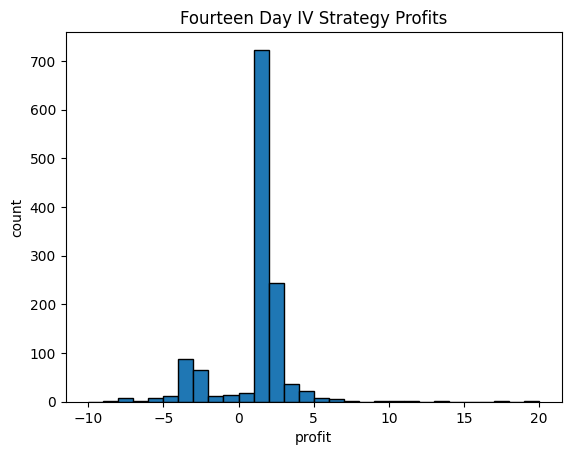

In [216]:
plt.hist(iron_df['strat_daily_net'], edgecolor = 'black', bins = 30, range = (-10,20))
plt.xlabel('profit')
plt.ylabel('count')
plt.title("Fourteen Day IV Strategy Profits")

In [208]:
np.sum(iron_df['strat_daily_net'] > 0) /  len(iron_df['strat_daily_net']) 

0.8362068965517241

In [209]:
print('Median net sell profit with Volume Strat')
print(-np.median(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]['net']))
print('Number of Viable Days')
print(len(iron_df[iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0]))

Median net sell profit with Volume Strat
1.5000000000000107
Number of Viable Days
612


In [211]:
#profit each day of volume strat
vol_sell = iron_df['lc_volume'] + iron_df['lp_volume'] - iron_df['sc_volume'] - iron_df['sp_volume'] > 0
iron_df['volume_strat'] = -iron_df['net'] * vol_sell
iron_df.describe()['volume_strat']


count    1276.000000
mean        0.625431
min        -7.800000
25%         0.000000
50%         0.000000
75%         1.500000
max       133.800000
std         4.121942
Name: volume_strat, dtype: float64

Text(0.5, 1.0, 'Fourteen Day Volume Strategy Profits')

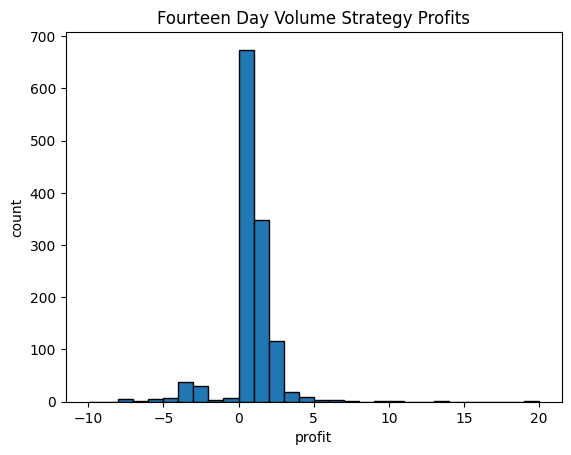

In [215]:
plt.hist(iron_df['volume_strat'], edgecolor = 'black', bins = 30, range = (-10,20))
plt.xlabel('profit')
plt.ylabel('count')
plt.title("Fourteen Day Volume Strategy Profits")

In [213]:
np.sum(iron_df['volume_strat'] > 0) / len(iron_df['volume_strat'])

0.40282131661442006